In [2]:
cd ..

/Users/odatakuma/cmu/FleetAI


In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import cPickle as pickle
import time
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from experiment import describe

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
score_dirs = ['without_score', 'rhc_score', 'dqn_score',  'dqn_score3']

In [12]:
root_dir = "data/results/"
result = []
for score_dir in score_dirs:
    for i in range(7):
        df = pd.read_csv(root_dir + score_dir + '/score' +  str(i) + '.csv')
        if i == 0:
            sdf = pd.DataFrame(columns=df.columns)            
        sdf.loc[i] = df.sum()
    result.append(sdf)

In [13]:
root_dir = "data/results/"
vscores = []
for score_dir in score_dirs:
    vscore = []
    for i in range(7):
        df = pd.read_csv(root_dir + score_dir + '/vscore' +  str(i) + '.csv')
        cap_util = df.service_time.mean() / (24 * 60)
        vscore.append(cap_util)
    vscores.append(vscore)

In [14]:
def plot_summary(dfs, vscore, labels):
    dayofweek = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    plt.figure(figsize=(10, 3))
    plt.subplot(121)
    plt.title('Reject Rate')   
    for df, label in zip(dfs, labels):
        index = df.index
        plt.plot(index, df.reject/df.requests, label=label)
    plt.ylabel('reject / request')
    plt.axis([0,6, 0,0.20])
    plt.xticks(index, dayofweek)
    plt.legend(loc='best')
    
    plt.subplot(122)
    plt.title('Utilization Rate')
    for v, label in zip(vscores, labels):
        plt.plot(index, v, label=label)
    plt.ylabel('service time / day')
    plt.xticks(index, dayofweek)
    
    plt.figure(figsize=(10, 3))
    plt.subplot(121)
    plt.title('Wait Time')
    for df, label in zip(dfs, labels):
        index = df.index
        plt.plot(index, df.wait_time/(df.requests-df.reject), label=label)
    plt.ylabel('minutes / request')
    plt.xticks(index, dayofweek)
    plt.legend(loc='best')
    
    plt.subplot(122)
    plt.title('Idle Cruising Time')
    for df, label in zip(dfs, labels):
        index = df.index
        plt.plot(index, df.idle_trip/8000, label=label)
    plt.ylabel('minutes / vehicle')
    plt.xticks(index, dayofweek)

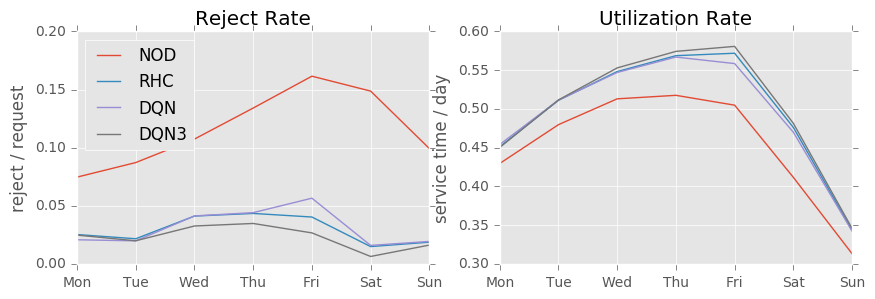

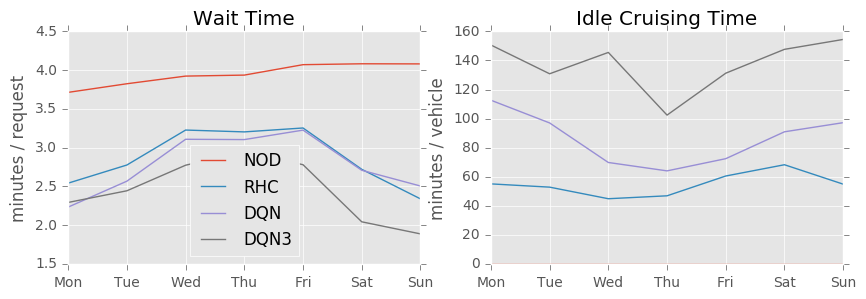

In [15]:
plot_summary(result, vscores, ['NOD', 'RHC', 'DQN', 'DQN3']);

In [16]:
def plot(dfs, labels):
    plt.figure(figsize=(10, 6))
    index = dfs[0].index * 15.0 / 60 + 4
    plt.subplot(311)
    plt.ylabel('Reject Rate')
    for df, label in zip(dfs, labels):
        plt.plot(index, df.reject / df.requests, label=label)
    plt.legend(loc='best')
    plt.subplot(312)
    plt.ylabel('Wait Time')
    for df, label in zip(dfs, labels):
        plt.plot(index, df.wait_time/(df.requests-df.reject), label=label)
    plt.subplot(313)
    plt.ylabel('Idle Cruising Time')
    for df, label in zip(dfs, labels):
        plt.plot(index, df.idle_trip/8000, label=label)
    return plt

In [29]:
root_dir = "data/results/"
dayofweek = 0
oneday = []
for score_dir in score_dirs:
    if 'dqn' in score_dir:
        df_ = pd.read_csv(root_dir +  score_dir + '/score' + str(dayofweek) + '.csv')
        df = pd.DataFrame(columns=df.columns)
        for i in range(len(df_)/15):
            df.loc[i] = df_.iloc[i*15:(i+1)*15].sum()
    else:
        df = pd.read_csv(root_dir + score_dir + '/score' + str(dayofweek) + '.csv')      
    oneday.append(df)

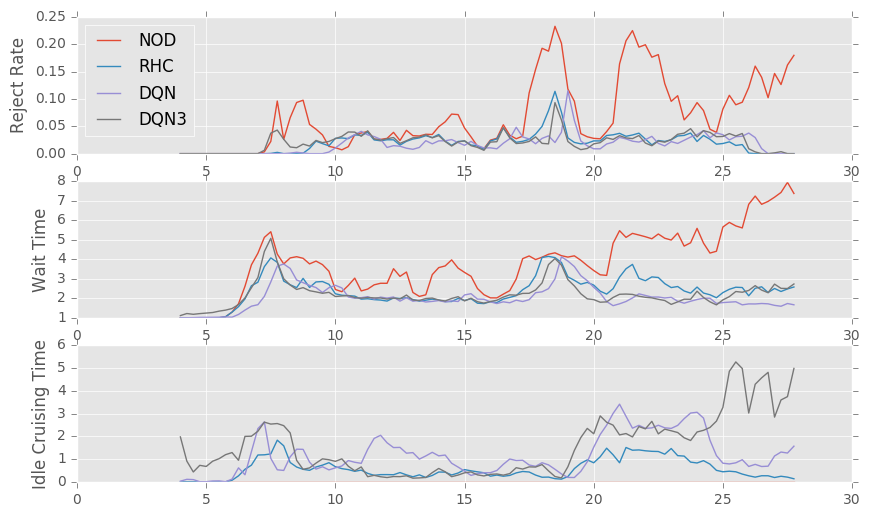

In [30]:
plot(oneday, ['NOD', 'RHC', 'DQN', 'DQN3']);